<h1 style="text-align: center; font-size: 36px;">Unsupervised learning - Clustering</h1>

##### Student information:
- Name: Tuan Anh NGUYEN
- Email: tuan.nguyen@etu.univ-cotedazur.fr

---

##### Tasks:
* Use the dataset: Digit: sklearn.datasets.load_digits -> expected number of cluster: 10
1. Try Kmeans algorithm
- Define the best cluster number with
    + Elbow approach
    + Silhouette approach
- Evaluate the clustering (silhouette and ARI)
    + Silhouette use the predicted cluster
    + ARI use predicted cluster and original label
2. Try DBscan algorithm
- Adjust parameters in order to obtain the expected number of clusters
- Evaluate the clustering (silhouette and ARI)
    + Silhouette use the predicted cluster
    + ARI use predicted cluster and original label



---





First, import library:

In [101]:
import sklearn
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score, adjusted_rand_score
from collections import Counter

from sklearn.cluster import KMeans, DBSCAN

Load the data:

In [102]:
data, target = load_digits(return_X_y=True)

# Normalize the data by divide to max value of data
n_value = np.max(data)
X = data / n_value
y = target

nbClass = len(set(y))
print("Real number of class of labels is: ", nbClass)

Real number of class of labels is:  10


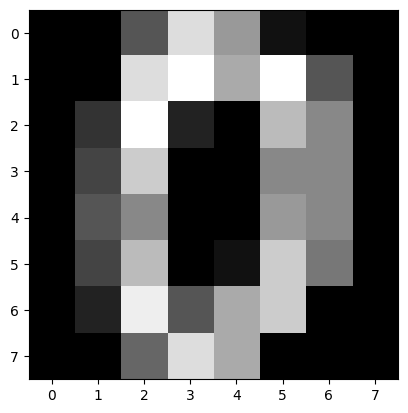

In [103]:
plt.imshow(data[0].reshape(8,-1), cmap='gray')
plt.show()

#### Create evaluate function


In [104]:
def evaluate_cluster(y_pred):
    print("Silhouette score: ", silhouette_score(X, y_pred, metric='euclidean'))
    print("ARI score:", adjusted_rand_score(y, y_pred))

#### 1. Try KMeans Clustering algorithm

- Create the plot function

In [105]:
def plot_curve(curves, x_label, y_label):
    curves_dict = dict(curves)
    xx = curves_dict.keys()
    yy = curves_dict.values()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(xx, yy, marker='o')

##### 1.1. Elbow approach

In [106]:
def elbow_approach():
    inertias = {}
    K = range(1, nbClass+11)             # From 1 -> 20
    for k in K:
        km = KMeans(n_clusters=k, random_state=4)
        km.fit(X)
        inertias[k] = km.inertia_       # Add to inertias dictionary with key: n_cluster and value: its inertia
        
    return inertias

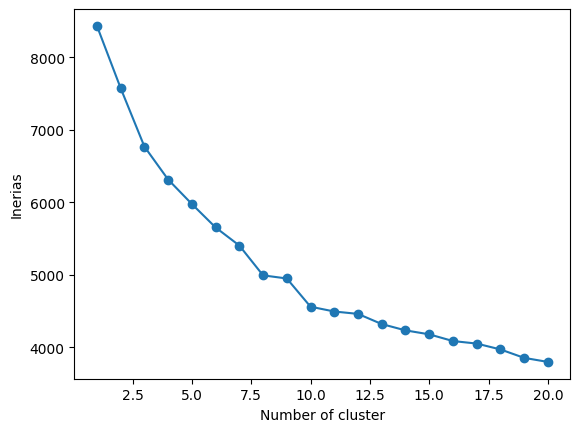

In [107]:
inerias = elbow_approach()
plot_curve(inerias, "Number of cluster", "Inerias")

- This figure show us that at the point $10$ clusters, the graph does not decrease significantly anymore, it decreases slowly. So the number of cluster should be $10$

##### 1.2. Silhouette approach

In [108]:
def silhouette_approach():
    silhouettes = {}
    K = range(2, nbClass+11)         # From 1 -> 20
    for k in K:
        km = KMeans(n_clusters=k, random_state=4)
        
        # Get the label prediction
        y_pred = km.fit_predict(X)
        
        # Compute the silhouette score
        silhouettes[k] = silhouette_score(X, y_pred)
        
    return silhouettes

silhouette score:  {2: 0.10448663456675199, 3: 0.12545333778728832, 4: 0.12325283939541426, 5: 0.12964428341577888, 6: 0.14021952049446595, 7: 0.14534667950674607, 8: 0.16815690555009025, 9: 0.15587319630641308, 10: 0.18839531802865592, 11: 0.17310471862875476, 12: 0.14681796835181485, 13: 0.14502708571661224, 14: 0.14429776831454935, 15: 0.13746128897941548, 16: 0.14318608993385132, 17: 0.13953138532289674, 18: 0.1412047557166134, 19: 0.140703106834245, 20: 0.14105450839508724}
Maximum silhouette score: 0.18839531802865592 with 10 clusters


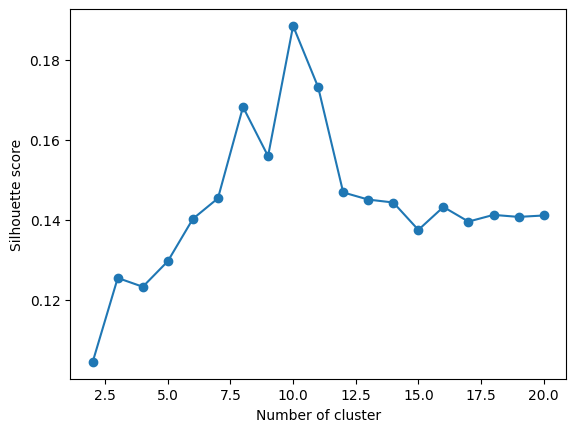

In [109]:
silhouettes = silhouette_approach()
print("silhouette score: ", silhouettes)
print(f"Maximum silhouette score: {max(silhouettes.values())} with {max(silhouettes, key=silhouettes.get)} clusters")
plot_curve(silhouettes, "Number of cluster", "Silhouette score")

##### 1.3. Evaluation

In [110]:
y_pred = KMeans(n_clusters=10, random_state=4).fit_predict(X)
evaluate_cluster(y_pred)

Silhouette score:  0.18839531802865592
ARI score: 0.6553630883258078


- **Sihouette score**: This is a relatively low score, suggesting that the clusters may not be well-separated. There could be overlap between clusters.
- **ARI score**: This is a moderately high score, indicating that the clustering has a reasonable agreement with the ground truth.

#### 2. Try DBscan algorithm

In [111]:

def DBSCAN_algorithm(eps = 0.5, min_samples = 5):
    # Create DBScan with arguments: eps and min_samples
    clustering = DBSCAN(eps=eps, min_samples = min_samples).fit(X)
    y_pred = clustering.labels_

    print("Labels predictions: ", Counter(y_pred))
    
    return y_pred
    
y_pred = DBSCAN_algorithm()

Labels predictions:  Counter({-1: 1797})


- We can see that all the labels are $-1$, the reason is **DBSCAN(eps = 0.5, min_samples = 5)** considers all of the points are noise

Let's try it again

In [112]:
y_pred = DBSCAN_algorithm(eps=1, min_samples=10)

Labels predictions:  Counter({-1: 1635, 0: 83, 2: 45, 1: 34})


It seems like if we increase the ***eps*** value and also the ***min_samples***, the number of noises is decreases and we have more classes/clusters

In [113]:
y_pred = DBSCAN_algorithm(eps=1.5, min_samples=10)

Labels predictions:  Counter({1: 716, -1: 201, 2: 178, 0: 177, 3: 164, 4: 152, 5: 147, 8: 27, 9: 15, 7: 11, 6: 9})


Now, we have all $10$ clusters/classes which are from $0$ to $9$, but it still has some noises point

- Evaluation


In [114]:
evaluate_cluster(y_pred)

Silhouette score:  0.08626205764970492
ARI score: 0.4049790871244583


- **Silhouette score**: Clusters are highly overlapping, with minimal separation between them.
- **ARI score**: A decreased ARI suggests reduced agreement between the predicted clusters and the ground truth labels.

- Plot some true labels images

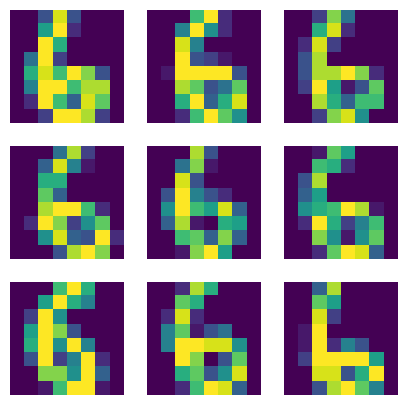

In [123]:
fig = plt.figure(figsize=(5,5))
true_data = data[y_pred == 2]
for i in range(1, 10):
    img_index = np.random.choice(range(len(true_data)), size=1, replace=False)
    fig.add_subplot(3, 3, i)
    plt.axis('off')
    plt.imshow(true_data[img_index].reshape(8,-1))
plt.show()

- Plot some noise images

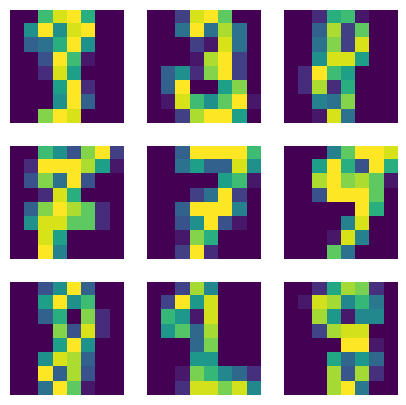

In [116]:
fig = plt.figure(figsize=(5,5))
noise_data = data[y_pred == -1]
for i in range(1, 10):
    img_index = np.random.choice(range(len(noise_data)), size=1, replace=False)
    fig.add_subplot(3, 3, i)
    plt.axis('off')
    plt.imshow(noise_data[img_index].reshape(8,-1))
plt.show()

---

##### Conclusion:
- Through this part, we've learned what is unsupervised learning, clustering and using KMeans and DBSCAN algorithms for clustering data.

References:
- Sk-learn cluster document: https://scikit-learn.org/1.5/api/sklearn.cluster.html